In [3]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.colors import Normalize

In [4]:
# Set up initial binary occupancy grid (0.0 = free, 100.0 = occupied, -1.0 = unknown)
O = np.zeros((20, 20))

# Define occupied walls (100.0)
O[0:7, [6, 13]] = 100.0  # Vertical walls
O[13:20, [6, 13]] = 100.0
O[[6, 13], 0:7] = 100.0  # Horizontal walls
O[[6, 13], 13:20] = 100.0

# Define unknown space (-1.0) in the horizontal hallways
O[7:13, 0:7] = -1.0
O[7:13, 13:20] = -1.0

In [26]:
# Custom function to assign color based on the cell value
def get_color(value):
    if value == 100.0:  # Occupied
        return 'black'
    elif value == 0.0:  # Free space
        return 'white'
    elif value <= -1.0:  # Unknown
        return 'red'
    else:  # Gradient between white and red for values between 0 and -1
        alpha = 1 + value  # Since value is between 0 and -1, alpha will be between 0 and 1
        print(alpha)
        if alpha > 1.0:
            alpha = 0.0
        red = 1.0  # Full red channel
        green_blue = alpha  # Alpha controls the blend between white (1,1,1) and red (1,0,0)
        return (red, green_blue, green_blue)  # Return color as (R, G, B) with varying green/blue

# Function to plot the custom grid with rectangles
def plot_custom_grid(ax, grid, title):
    ax.set_title(title)
    ax.set_xlim(0, grid_size[1])
    ax.set_ylim(0, grid_size[0])
    ax.set_aspect('equal')
    ax.invert_yaxis()  # Invert y-axis to match grid indexing
    
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            color = get_color(grid[i, j])
            rect = Rectangle((j, i), 1, 1, color=color)
            ax.add_patch(rect)
    
    ax.axis('off')

0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.9375
0.9375
0.6875
0.9375
0.9375
0.6875
0.625
0.9375
0.9375
0.625
0.625
0.9375
0.9375
0.625
0.625
0.9375
0.9375
0.625
0.625
0.9375
0.9375
0.625
0.6875
0.9375
0.9375
0.6875
0.9375
0.9375
0.984375
0.984375
0.90625
0.96875
0.96875
0.90625
0.625
0.90625
0.984375
0.984375
0.90625
0.625
0.5625
0.875
0.984375
0.984375
0.875
0.5625
0.546875
0.875
0.984375
0.984375
0.875
0.546875
0.546875
0.875
0.984375
0.984375
0.875
0.546875
0.5625
0.875
0.984375
0.984375
0.875
0.5625
0.625
0.90625
0.984375
0.984375
0.90625
0.625
0.90625
0.96875
0.96875
0.90625
0.984375
0.984375
0.99609375
0.99609375
0.97265625
0.98828125
0.98828125
0.97265625
0.87109375
0.953125
0.98828125
0.98828125
0.953125
0.87109375
0.59375
0.86328125
0.96875
0.96875
0.86328125
0.59375
0.51171875
0.83203125
0.95703125
0.95703125
0.83203125
0.51171875
0.49609375
0.8203125
0.95703125
0.95703125
0.8203125
0.49609375
0.49609375
0.8203125
0.95703125
0.95703125
0.8203125
0.49609375


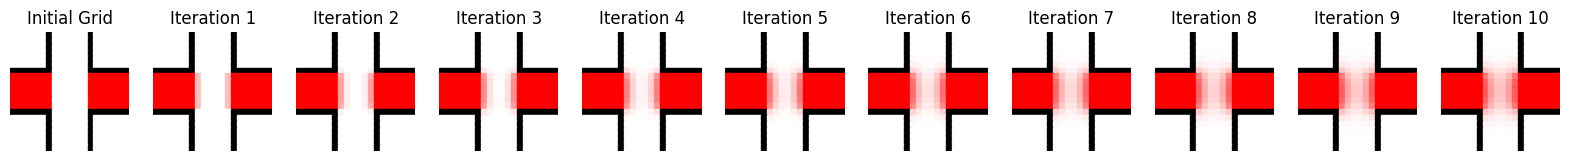

In [32]:
# Define parameters for the diffusion process
alpha = 0.25  # Diffusion coefficient
max_iterations = 10  # Number of iterations to visualize
grid_size = O.shape

# Create a list to store grids at each iteration
grids = [O.copy()]

# Get the original grid with unknown spaces (-1.0) replaced by the average of the free neighbors
O_unknown = O.copy()

# Run the diffusion process and store grids at each iteration
O_smoothed = O.copy()
for iteration in range(1, max_iterations + 1):
    O_new = O_smoothed.copy()
    for i in range(1, grid_size[0] - 1):
        for j in range(1, grid_size[1] - 1):

            if O_unknown[i, j] == 0.0:  # Apply diffusion only to original free spaces (0.0)

                # Use neighbors with boundary handling (reflect at the edges)
                up = O_smoothed[i-1, j] if i > 0 and O_smoothed[i-1, j] != 100.0 else O_smoothed[i, j]
                down = O_smoothed[i+1, j] if i < grid_size[0] - 1 and O_smoothed[i+1, j] != 100.0 else O_smoothed[i, j]
                left = O_smoothed[i, j-1] if j > 0 and O_smoothed[i, j-1] != 100.0 else O_smoothed[i, j]
                right = O_smoothed[i, j+1] if j < grid_size[1] - 1 and O_smoothed[i, j+1] != 100.0 else O_smoothed[i, j]
                
                O_new[i, j] = O_smoothed[i, j] + alpha * (up + down + left + right - 4 * O_smoothed[i, j])
    
    O_smoothed = O_new
    grids.append(O_smoothed.copy())

# Plot the initial grid and grids at each iteration with custom colors
fig, axs = plt.subplots(1, max_iterations + 1, figsize=(20, 4))

plot_custom_grid(axs[0], grids[0], "Initial Grid")
for i in range(1, max_iterations + 1):
    plot_custom_grid(axs[i], grids[i], f"Iteration {i}")

plt.show()